In [1]:
# Standard Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from IPython.display import display, Latex

In [2]:
# Plot settings
plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=18)
plt.rc("legend", fontsize=16)
plt.rc("figure", figsize=(7, 5), titlesize=18)

In [3]:
# Functions
def delta_n(m, lamb, d):
    return (m * lamb) / (2 * d)

def n_luft(k):
    return 1 + k

def make_ax(data, x, y, xlabel = 'x', ylabel = 'y', title = 'Title', figsize = (10, 10), save = False, label = None, filename = 'default.pdf'):
    # Make fig and ax
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot data
    ax.scatter(data[x], data[y], label = label)

    # Set title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Save fig if save == True
    if save:
        plt.savefig(filename)
    
    # Return fig and ax
    return fig, ax

def plot_ax(ax, legend = False, grid = False):
    if grid:
        ax.grid()
    if legend:
        ax.legend()
    plt.show()
    
def calculate_fit_for_k(data):
    _delta_n = lambda x, k: k * delta_p # Alternative version of delta_n function above
    
    # Calculate k
    popt, pcov = curve_fit(delta_n, data['pressure'], data['delta_n']) # insert sigma = ?, absolute_sigma = True when ready
    
    # Return k and covariance matrix
    return popt, pcov

def plot_fit_for_k(data, k, ax):
    _delta_n = lambda delta_p, k: k * delta_p # Alternative version of delta_n function above
    
    # Calculate delta_n from fitted parameter k
    delta_n_fit = [_delta_n(d_p, k) for d_p in data['pressure']]
    
    # Plot fit
    ax.plot(data['pressure'], delta_n_fit, color = 'black', linestyle = 'dashed', label = 'Linear fit')
    
    # Return ax
    return ax

In [4]:
# Load number of peaks found in cleaning directory
df = pd.read_csv('../Cleaned_Data/number_of_peaks.csv')

In [5]:
# Visualize dataframe
df.head(6)

,pressure,maximums,minimums,total,easy_to_read
0,0.5,8,8,16,0
1,0.6,9,9,18,1
2,0.7,11,11,22,1
3,0.8,13,13,26,1
4,0.9,14,14,28,1
5,1.0,15,15,30,1


In [6]:
# Variables
lamb = 633 * 10**(-9) #m
d = 6.7 * 10**(-2) #m plus minus 0.001m

In [7]:
# Calculate a value delta_n for every m (total)
df['delta_n'] = [delta_n(m, lamb, d) for m in df['total']]

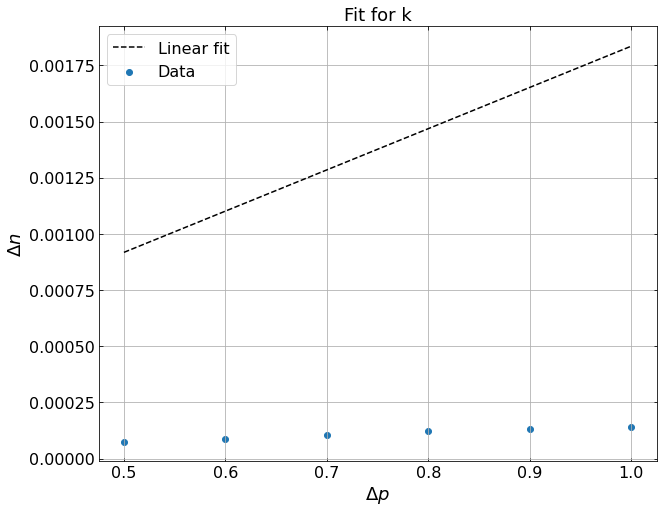

In [8]:
# Plot 'delta_n = k * delta_p' and fit for k (linear)

# Make ax and fig
fig, ax = make_ax(df, x = 'pressure', y = 'delta_n', xlabel = r'$\Delta p$', ylabel = r'$\Delta n$', 
                  title = 'Fit for k', figsize = (10, 8), label = 'Data')

# Make curvefit for k
popt, pcov = calculate_fit_for_k(df)

# Plot fit
ax = plot_fit_for_k(df, popt[0], ax)

# Plot ax
plot_ax(ax, grid = True, legend = True)

In [9]:
# Calculate refrative index of air
n_luft_value = n_luft(popt[0])
n_luft_error = 0

# Print result
display(Latex(f'Refrative index of air equals: {n_luft_value} $\pm$ {n_luft_error}'))

<IPython.core.display.Latex object>

Possible reasons why fit is off:
  -  Number of maximums and minimums is counted wrongly
  -  Some of the math might be off
  -  Systematic errors in experiment
  
What needs to be done:
  -  Calculate uncertainty in refrative index of air
  -  Possibly resolve some of the points above